In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_file = "city_data.csv"
ride_file = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_file)
ride_data = pd.read_csv(ride_file)

# Combine the data into a single dataset
all_data = pd.merge(ride_data, city_data, on="city")

# Display the data table for preview
all_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

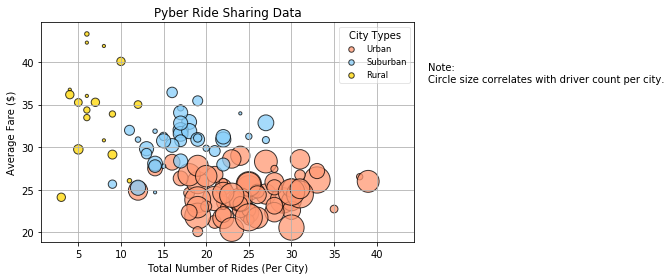

In [2]:
# By City type and City, get ride counts and fare average
bubble_city_type = all_data.groupby(
   ["type", "city"]
).agg(
    {
         'ride_id':'count',
         'fare': 'mean'
    }
)

# reset indexes
bubble_city_type = bubble_city_type.reset_index()

# Add driver count
bubble_city_type=pd.merge(bubble_city_type, city_data, on="city")
bubble_city_type=bubble_city_type.drop(columns='type_y')

# rename columns
bubble_city_type = bubble_city_type.rename(columns={
    "type_x":"type",
    "ride_id":"NoOfRides",
    "fare":"AvgFare"
})

# Get each city data
rural = bubble_city_type.loc[bubble_city_type["type"]=='Rural']
urban = bubble_city_type.loc[bubble_city_type["type"]=='Urban']
suburban = bubble_city_type.loc[bubble_city_type["type"]=='Suburban']

# Build the scatter plots for each city types
fig, ax = plt.subplots()
urban.plot(kind='scatter', x='NoOfRides', y='AvgFare', ax=ax, 
           color="#ff9873", edgecolors="black", alpha=0.75, s=urban['driver_count']*10)
suburban.plot(kind='scatter', x='NoOfRides', y='AvgFare', ax=ax, 
              color="lightskyblue", edgecolors="black", alpha=0.75, s=suburban['driver_count']*10)
rural.plot(kind='scatter', x='NoOfRides', y='AvgFare', ax=ax, 
           color="gold", edgecolors="black", alpha=0.75, s=rural['driver_count']*10)

# turn on grids
ax.grid()

# Incorporate the other graph properties
ax.set_title("Pyber Ride Sharing Data")
ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")

# Add legend and re-size legen bubbles
bublegend = plt.legend(["Urban","Suburban","Rural"], title="City Types", fontsize='small', framealpha=0.5)
bublegend.legendHandles[0]._sizes = [30]
bublegend.legendHandles[1]._sizes = [30]
bublegend.legendHandles[2]._sizes = [30]

# Save and show chart
note="Note: \nCircle size correlates with driver count per city."
plt.figtext(1, 0.7, note, wrap=True, horizontalalignment='left', fontsize=10)
plt.tight_layout()
plt.axis("equal")
plt.xlim(5, 40)
plt.savefig("PyberRideSharingData.png")
plt.show()

## Total Fares by City Type

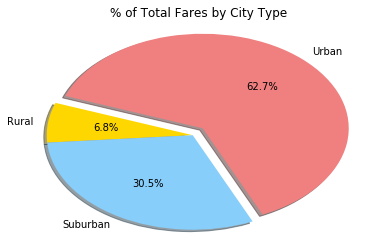

In [3]:
# Calculate Type Percents
fare_city_type = all_data.groupby("type")
total_fare = all_data["fare"].sum()
total_fare_city_type = ((fare_city_type["fare"].sum()/total_fare)*100).to_frame()

# Set index name
total_fare_city_type.index.name="city_type"

# Set colors and explode
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

# Build Pie Chart
plt.figure(figsize=(6,4))
plt.pie(total_fare_city_type["fare"], 
        labels=total_fare_city_type.index, 
        colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160, explode=explode)
plt.title("% of Total Fares by City Type")
plt.axis("auto")

# Save and show chart
plt.savefig("TotalFaresbyCityType.png")
plt.show()

## Total Rides by City Type

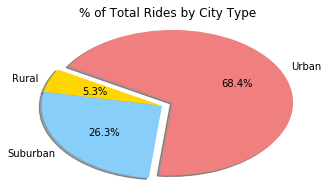

In [4]:
# Calculate Type Percents
ride_city_type = all_data.groupby("type")
total_ride = all_data["ride_id"].count()
total_ride_city_type = ((ride_city_type["ride_id"].count()/total_ride)*100).to_frame()

# Set index name
total_ride_city_type.index.name="city_type"

# Set colors and explode
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

# Build Pie Chart
plt.figure(figsize=(5,3))
plt.pie(total_ride_city_type["ride_id"], 
        labels=total_ride_city_type.index, 
        colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150, explode=explode)
plt.title("% of Total Rides by City Type")
plt.axis("auto")

# Save and show chart
plt.savefig("TotalRidesbyCityType.png")
plt.show()

## Total Drivers by City Type

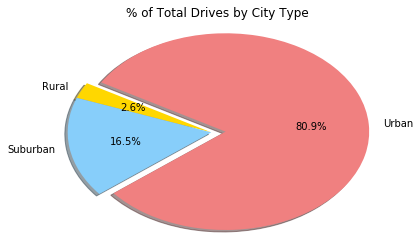

In [5]:
# Calculate Type Percents
driver_city_type = city_data.groupby("type")
total_driver = city_data["driver_count"].sum()
total_driver_city_type = ((driver_city_type["driver_count"].sum()/total_driver)*100).to_frame()

# Set index name
total_driver_city_type.index.name="city_type"

# Set colors and explode
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

# Build Pie Chart
plt.figure(figsize=(6,4))
plt.pie(total_driver_city_type["driver_count"], 
        labels=total_driver_city_type.index, 
        colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150, explode=explode)
plt.title("% of Total Drives by City Type")
plt.axis("auto")

# Save and show chart
plt.savefig("TotalDriversbyCityType.png")
plt.show()